# Big Data Project: Retail Transactions in the UK
As part of our Semester 6, we worked on this project that helps us apply our knowledge while analysing Big Data. This project submission is made to Prof Tushar Jaruhar and the link to access the data used has been provided in references. The team consists of 4 members, namely:

<li>Rithwik Chhugani - BS18BDS008</li>
<li>Pratiksha Sharma - BS18BDS010</li>
<li>Daksh Khandelwal - BS18BDS013</li>
<li>Gautam Sadarangani - BS18BDS015</li>

For doubts or queries, please contact the team on any of these email addresses: rithwik.bs18bds008@spjain.org, pratiksha.bs18bds010@spjain.org, daksh.bs18bds013@spjain.org, gautam.bs18bds015@spjain.org

You can also message/call on: +91 8791607009

## The Data
Data comes from Dunnhumby – a one stop destination for retail data. You can check them out on https://www.dunnhumby.com/


We have accessed one of their recent in-store transactional datawarehouses for the data that we will be analysing in this project. Although they anonymize the individual transactions, the main source of this are these retailers in the UK:

![title](pic.png)

## Why analyse Retail Data?

1. Make a customer-first business by layering customer insights in all decisions
2. Improve Operational Efficiency 
3. Launch campaigns and promotions that successfully increase your sales

## The Project

The notebook is divided in the following sections:
1. Importing of all necessary libraries
2. Importing datasets
3. Studying data tables using the documentation
4. Defining Project Objectives
5. Making joins wherever necessary
6. Cleaning and Preprocessing of Data
7. Achieving Objectives
8. Conclusion
9. References

### 1: Importing all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### 2: Importing Datasets

In [3]:
campaign_desc = pd.read_csv('C:/Users/Pratiksha Sharma/Downloads/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/campaign_desc.csv')
campaign_table = pd.read_csv('C:/Users/Pratiksha Sharma/Downloads/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/campaign_table.csv')
coupon = pd.read_csv('C:/Users/Pratiksha Sharma/Downloads/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/coupon.csv')
hh_demographic = pd.read_csv('C:/Users/Pratiksha Sharma/Downloads/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/hh_demographic.csv')
product = pd.read_csv('C:/Users/Pratiksha Sharma/Downloads/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/product.csv')
transaction_data = pd.read_csv('C:/Users/Pratiksha Sharma/Downloads/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/transaction_data_2.0.csv')

### 3: Studying Data Tables using Documentation

![title](pic2.jpg)

### 4: Defining Project Objectives
After studying the data in the wearehouse, we formulated these four main objectives to fulfill in this project:

<li>Study Sales patterns</li>
<li>Transaction wise households clustering and analysis of demographics</li>
<li>Studying transactions and products on which coupons have been applied, campaigns under which these coupons were released and households that are using these coupons</li>
<li>Discounts on transactions & the products that these discounts are applied on</li>

### 5: Making Joins wherever necessary
Based on our project objectives, we saw fit to make the following joins:

1. campaigns table: Joining CAMPAIGNS_DESC & CAMPAIGN_TABLE on ‘Campaign’
2. transactions table: Joining TRANSACTION_DATA & PRODUCT on ‘PRODUCT ID’
3. coupons table: Joining COUPON & PRODUCT on ‘PRODUCT ID’
4. coupon_transactions table : Joining COUPON & TRANSACTION_DATA  on ‘PRODUCT ID’

In [4]:
campaigns = pd.merge(campaign_table[['household_key', 'CAMPAIGN']],campaign_desc, on='CAMPAIGN')
campaigns

,household_key,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY
0,17,26,TypeA,224,264
1,27,26,TypeA,224,264
2,212,26,TypeA,224,264
3,208,26,TypeA,224,264
4,192,26,TypeA,224,264
...,...,...,...,...,...
7203,1803,15,TypeC,547,708
7204,1082,15,TypeC,547,708
7205,942,15,TypeC,547,708
7206,855,15,TypeC,547,708


In [5]:
transactions = pd.merge(transaction_data,product,on='PRODUCT_ID')
transactions.drop('Unnamed: 0',axis=1,inplace=True)
transactions = transactions.dropna()
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.60,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.60,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.60,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.00,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580651,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2580652,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580653,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580654,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [6]:
coupons = pd.merge(coupon,product,on='PRODUCT_ID')
coupons = coupons.dropna()
coupons

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089266,27160,18,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
2,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
3,10000085361,27754,8,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
4,10000085427,27754,13,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
...,...,...,...,...,...,...,...,...,...
124543,10000085478,17903204,18,751,DRUG GM,National,BABY HBC,BABY WIPES,232 CT
124544,10000085478,17902690,18,751,DRUG GM,National,BABY HBC,BABY WIPES,
124545,10000085475,17330255,18,1646,PRODUCE,National,SALAD MIX,BLENDS,10.25 OZ
124546,10000085478,17329098,18,764,DRUG GM,National,DEODORANTS,ANTIPERSPIRANTS ONLY (ALL OTHE,


In [7]:
coupon_transactions = pd.merge(transaction_data,coupon,on='PRODUCT_ID')
coupon_transactions.drop('Unnamed: 0',axis=1,inplace=True)
coupon_transactions = coupon_transactions[coupon_transactions.COUPON_DISC<0.0]
coupon_transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,COUPON_UPC,CAMPAIGN
107055,266,28788937156,142,826249,5,4.95,367,0.0,2254,21,-0.99,0.00,10000089106,13
107056,174,28788971473,142,826249,1,0.99,31642,0.0,1424,21,-0.99,0.00,10000089106,13
107072,1803,28789936419,143,826249,1,0.89,338,-0.1,1654,21,-0.99,0.00,10000089106,13
107073,1483,28789960612,143,826249,1,0.99,370,0.0,1012,21,-0.99,0.00,10000089106,13
107092,2500,28840722163,145,826249,1,0.99,447,0.0,1846,21,-0.99,0.00,10000089106,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788275,2296,42211776436,705,13511467,1,12.95,368,0.0,1544,101,-3.00,0.00,10000085428,13
4788276,2296,42211776436,705,13511467,1,12.95,368,0.0,1544,101,-3.00,0.00,10000085478,18
4788674,2125,42291245957,711,9830343,1,1.64,795,-0.2,1427,102,-0.35,-0.35,10000085429,13
4788675,2125,42291245957,711,9830343,1,1.64,795,-0.2,1427,102,-0.35,-0.35,10000085363,8


### 6: Cleaning and Preprocessing of Data

In [8]:
campaigns = campaigns.convert_dtypes()
transactions = transactions.convert_dtypes()
coupons = coupons.convert_dtypes()
coupon_transactions = coupon_transactions.convert_dtypes()

In [9]:
campaigns = campaigns.reset_index(drop=True)
transactions = transactions.reset_index(drop=True)
coupons = coupons.reset_index(drop=True)
coupon_transactions = coupon_transactions.reset_index(drop=True)

In [10]:
"""Empty current commodity size – filled with NaN values since some products 
may genuinely not have a size like fresh produce"""
transactions[transactions['CURR_SIZE_OF_PRODUCT']==" "]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
5994,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
5995,212,26985205886,1,1036325,1,0.99,288,-0.3,1341,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
5996,718,26985360571,1,1036325,1,0.99,324,-0.3,1115,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
5997,1905,27101487638,11,1036325,1,1.29,375,0.0,1747,2,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
5998,1828,27115140971,12,1036325,1,1.29,317,0.0,1428,2,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580587,681,42289790635,711,9195141,1,2.99,443,0.0,1142,102,0.0,0.0,178,DRUG GM,National,GREETING CARDS/WRAP/PARTY SPLY,SPECIAL EVERYDAY,
2580588,2168,42289822301,711,10182779,1,1.5,306,0.0,1754,102,0.0,0.0,5423,PASTRY,National,ROLLS,ROLLS: SANDWICH,
2580593,2245,42289890785,711,1065944,1,4.99,380,0.0,1053,102,0.0,0.0,2436,DRUG GM,National,HARDWARE SUPPLIES,CLOSET ACCESSORIES,
2580595,1823,42289906117,711,15927110,1,5.59,402,0.0,1334,102,0.0,0.0,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,


In [11]:
transactions = transactions.replace(" ",np.nan)
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580651,1598,42305362535,711,92130,1,0.99,3228,0.0,1520,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2580652,1598,42305362535,711,114102,1,8.89,3228,0.0,1520,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580653,1598,42305362535,711,133449,1,6.99,3228,0.0,1520,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580654,1598,42305362535,711,6923644,1,4.5,3228,-0.49,1520,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [12]:
transactions[transactions['CURR_SIZE_OF_PRODUCT'].isna()]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
5994,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,<NA>
5995,212,26985205886,1,1036325,1,0.99,288,-0.3,1341,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,<NA>
5996,718,26985360571,1,1036325,1,0.99,324,-0.3,1115,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,<NA>
5997,1905,27101487638,11,1036325,1,1.29,375,0.0,1747,2,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,<NA>
5998,1828,27115140971,12,1036325,1,1.29,317,0.0,1428,2,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580587,681,42289790635,711,9195141,1,2.99,443,0.0,1142,102,0.0,0.0,178,DRUG GM,National,GREETING CARDS/WRAP/PARTY SPLY,SPECIAL EVERYDAY,<NA>
2580588,2168,42289822301,711,10182779,1,1.5,306,0.0,1754,102,0.0,0.0,5423,PASTRY,National,ROLLS,ROLLS: SANDWICH,<NA>
2580593,2245,42289890785,711,1065944,1,4.99,380,0.0,1053,102,0.0,0.0,2436,DRUG GM,National,HARDWARE SUPPLIES,CLOSET ACCESSORIES,<NA>
2580595,1823,42289906117,711,15927110,1,5.59,402,0.0,1334,102,0.0,0.0,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,<NA>


In [13]:
# Cancelled products in a bill (having quantity<1) – dropped
transactions = transactions[transactions['QUANTITY']>=1]
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580651,1598,42305362535,711,92130,1,0.99,3228,0.0,1520,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2580652,1598,42305362535,711,114102,1,8.89,3228,0.0,1520,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580653,1598,42305362535,711,133449,1,6.99,3228,0.0,1520,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580654,1598,42305362535,711,6923644,1,4.5,3228,-0.49,1520,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [14]:
# Transactions having retail discounts (in actual money) > 0 – dropped
transactions = transactions[transactions.RETAIL_DISC<=0.0]
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580651,1598,42305362535,711,92130,1,0.99,3228,0.0,1520,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2580652,1598,42305362535,711,114102,1,8.89,3228,0.0,1520,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580653,1598,42305362535,711,133449,1,6.99,3228,0.0,1520,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2580654,1598,42305362535,711,6923644,1,4.5,3228,-0.49,1520,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [15]:
# convert transaction time to minutes
def min_func(x):
    xx=(x-(x%100))/100
    yy=x%100
    return ((xx*60)+yy)

In [16]:
transactions["TRANS_TIME"] = transactions["TRANS_TIME"].apply(lambda x: min_func(x))
transactions["TRANS_TIME"]

<ipython-input-16-3fa3600eec8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["TRANS_TIME"] = transactions["TRANS_TIME"].apply(lambda x: min_func(x))


0           991.0
1          1075.0
2            35.0
3           951.0
4          1383.0
            ...  
2580651     920.0
2580652     920.0
2580653     920.0
2580654     920.0
2580655     920.0
Name: TRANS_TIME, Length: 2580558, dtype: float64

In [17]:
# instead of 5+ we are using 5 to make calculations simpler for hh_demographic table
for i in range(len(hh_demographic["HOUSEHOLD_SIZE_DESC"])):
    if(hh_demographic["HOUSEHOLD_SIZE_DESC"][i] == "5+"):
        hh_demographic["HOUSEHOLD_SIZE_DESC"][i] = 5

<ipython-input-17-d9033aca6134>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_demographic["HOUSEHOLD_SIZE_DESC"][i] = 5


In [18]:
hh_demographic["HOUSEHOLD_SIZE_DESC"]

0      2
1      2
2      3
3      4
4      1
      ..
796    2
797    3
798    1
799    2
800    3
Name: HOUSEHOLD_SIZE_DESC, Length: 801, dtype: object

In [19]:
hh_demographic = hh_demographic.convert_dtypes()
transactions = transactions.convert_dtypes()

In [20]:
transactions = transactions.reset_index(drop=True)
hh_demographic = hh_demographic.reset_index(drop=True)

### 7: Achieving Objectives

#### Study Day & Week Sales Patterns

In [34]:
# Weekly Sales Analysis

In [35]:
#Choosing a store
transactions['STORE_ID'].value_counts()

367     75097
406     59065
356     49103
381     44992
292     44970
        ...  
659         1
3134        1
3141        1
3009        1
195         1
Name: STORE_ID, Length: 581, dtype: Int64

In [36]:
#Selecting Weekly Sales for only Store ID - 367
trans1 = transactions[transactions['STORE_ID']==367].groupby(['WEEK_NO'], dropna=False)

In [37]:
weekly_mean_sales = trans1['SALES_VALUE'].mean()
#weekly_mean_sales = weekly_mean_sales.pct_change().dropna()
weekly_mean_sales

WEEK_NO
1      4.099677
2      2.218182
3      2.956532
4      3.364596
5      3.143426
         ...   
98     3.833605
99     3.631945
100    3.640092
101    3.637291
102    4.066296
Name: SALES_VALUE, Length: 102, dtype: Float64

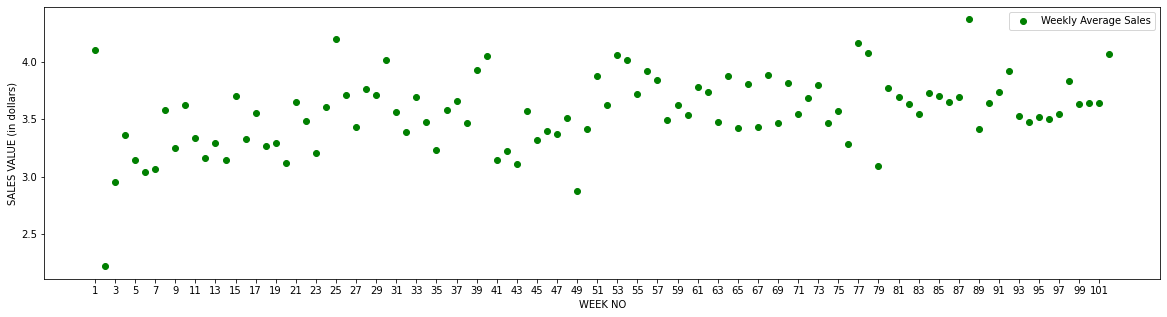

In [38]:
plt.figure(figsize=(20,5))
plt.scatter(weekly_mean_sales.index, np.array(weekly_mean_sales), label='Weekly Average Sales', color='green')
plt.xlabel('WEEK NO')
plt.ylabel('SALES VALUE (in dollars)')
plt.xticks(np.arange(1, 103,2))
plt.legend()
plt.show()

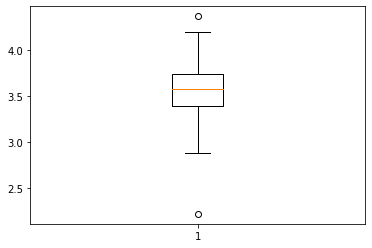

In [39]:
plt.boxplot(weekly_mean_sales)
plt.show()

In [40]:
# Finding the majority of sales split
print(len(transactions[transactions['SALES_VALUE']<=5.5])/len(transactions['SALES_VALUE']))
print(len(transactions[transactions['SALES_VALUE']>5.5])/len(transactions['SALES_VALUE']))

0.8939655686870824
0.10603443131291759


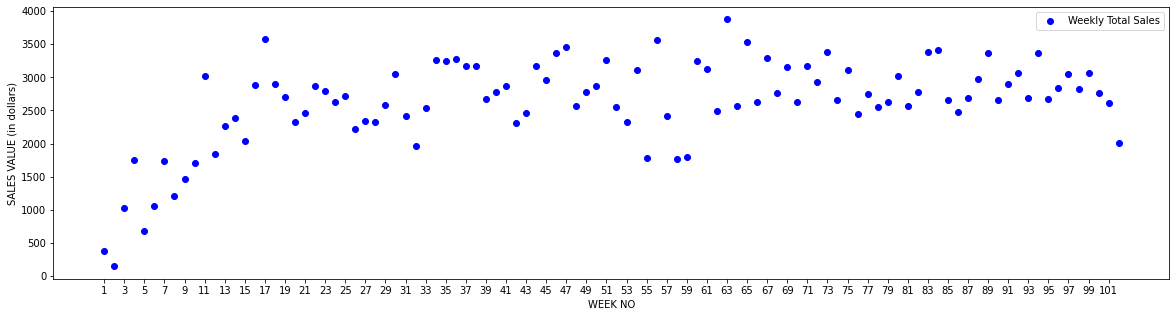

In [41]:
weekly_total_sales = trans1['SALES_VALUE'].sum()

plt.figure(figsize=(20,5))
plt.scatter(weekly_total_sales.index, weekly_total_sales, label='Weekly Total Sales', color='blue')
plt.xlabel('WEEK NO')
plt.ylabel('SALES VALUE (in dollars)')
plt.xticks(np.arange(1, 102,2))
plt.legend()
plt.show()

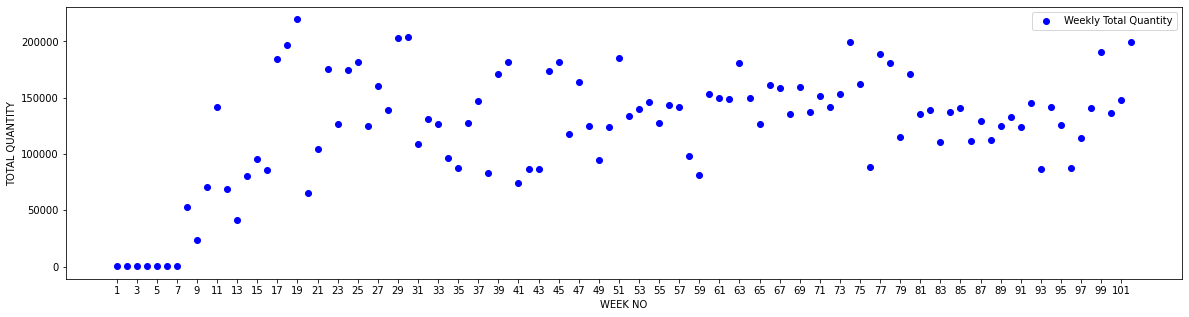

In [42]:
weekly_sold_qty = trans1['QUANTITY'].sum()

plt.figure(figsize=(20,5))
plt.scatter(weekly_sold_qty.index, weekly_sold_qty, label='Weekly Total Quantity', color='blue')
plt.xlabel('WEEK NO')
plt.ylabel('TOTAL QUANTITY')
plt.xticks(np.arange(1, 102,2))
plt.legend()
plt.show()

In [43]:
weekly_sold_qty[:20]

WEEK_NO
1        124
2         99
3        422
4        665
5        280
6        429
7        677
8      52897
9      23677
10     70820
11    141378
12     69033
13     41084
14     80501
15     95796
16     86034
17    183928
18    196430
19    219577
20     65125
Name: QUANTITY, dtype: Int64

In [44]:
# Daily Sales Analysis

In [45]:
trans2 = transactions[transactions['STORE_ID']==367].groupby(['DAY'], dropna=False)

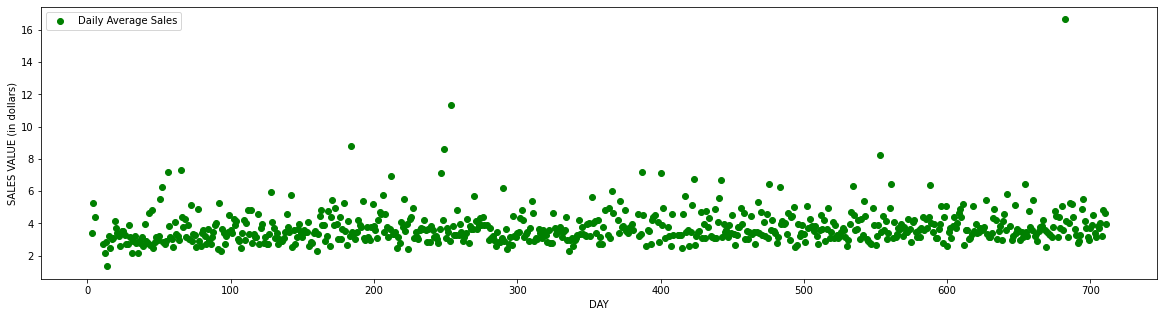

In [46]:
daily_average_sales = trans2['SALES_VALUE'].mean()

plt.figure(figsize=(20,5))
plt.scatter(daily_average_sales.index, daily_average_sales, label='Daily Average Sales', color='green')
plt.xlabel('DAY')
plt.ylabel('SALES VALUE (in dollars)')
plt.legend()
plt.show()

In [47]:
# Finding the extraordinary sale
daily_average_sales[daily_average_sales==max(daily_average_sales)]

DAY
682    16.66
Name: SALES_VALUE, dtype: Float64

In [48]:
trans_682 = transactions[transactions['STORE_ID']==367]
trans_682[trans_682['DAY']==682]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
1067750,853,41904255286,682,871722,1,3.0,367,-0.19,1054,98,0.0,0.0,151,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/T,20 OZ,3.19
1803391,1935,41904254752,682,6533889,13989,33.0,367,-1.4,1017,98,0.0,0.0,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.002459
2573377,853,41904255286,682,16219297,2,13.98,367,0.0,1054,98,0.0,0.0,2366,GROCERY,National,DOMESTIC WINE,POPULAR 750ML WINES,750 ML,6.99


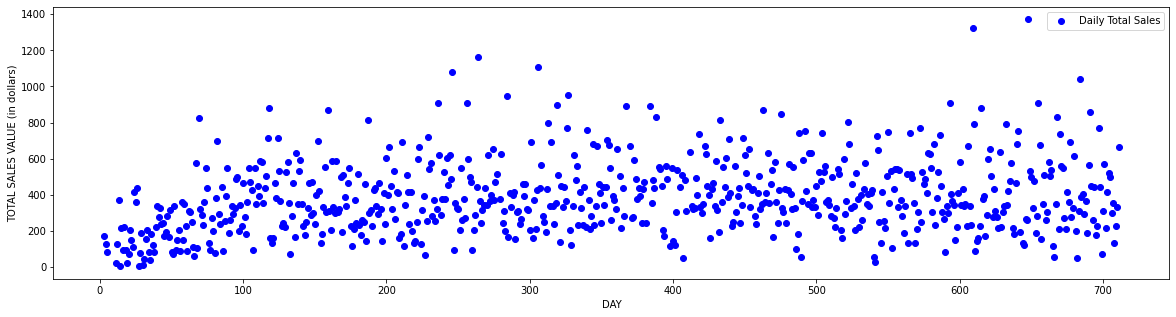

In [49]:
daily_total_sales = trans2['SALES_VALUE'].sum()

plt.figure(figsize=(20,5))
plt.scatter(daily_total_sales.index, daily_total_sales, label='Daily Total Sales', color='blue')
plt.xlabel('DAY')
plt.ylabel('TOTAL SALES VALUE (in dollars)')
plt.legend()
plt.show()

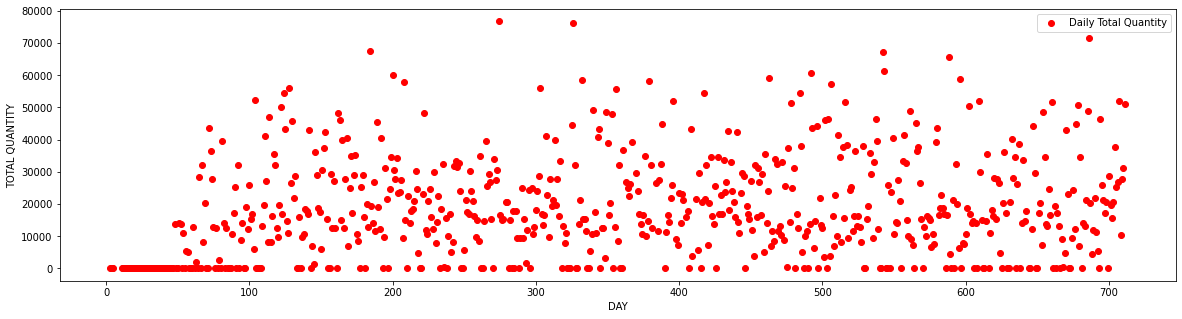

In [50]:
daily_sold_qty = trans2['QUANTITY'].sum()

plt.figure(figsize=(20,5))
plt.scatter(daily_sold_qty.index, daily_sold_qty, label='Daily Total Quantity', color='red')
plt.xlabel('DAY')
plt.ylabel('TOTAL QUANTITY')
plt.legend()
plt.show()

In [51]:
# Finding products with maximum transactions

In [52]:
trans3 = transactions[transactions['STORE_ID']==367].groupby(['DAY', 'PRODUCT_ID'], dropna=False)
trans3['SALES_VALUE'].count().sort_values(ascending=False).head(10)

DAY  PRODUCT_ID
236  1082185       7
200  6534178       6
140  5569074       6
184  6534178       6
124  6534178       6
222  6534178       5
388  1082185       5
163  6534178       5
208  6534178       5
692  1082185       5
Name: SALES_VALUE, dtype: int64

In [53]:
transactions[(transactions['PRODUCT_ID']==1082185) & (transactions['STORE_ID']==367) & (transactions['DAY']==236)]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
13933,1781,30579055651,236,1082185,1,0.36,367,-0.25,574,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.61
13934,544,30579056258,236,1082185,1,0.1,367,-0.08,665,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.18
13935,1854,30579060156,236,1082185,1,0.47,367,-0.32,997,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.79
13936,309,30579061494,236,1082185,1,0.56,367,-0.39,1108,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.95
13937,883,30579061648,236,1082185,1,0.54,367,-0.37,1121,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.91
13938,1057,30579061818,236,1082185,1,0.47,367,-0.33,1138,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.8
13939,1881,30579061935,236,1082185,1,0.53,367,-0.37,1152,34,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.9


In [54]:
transactions[(transactions['PRODUCT_ID']==6534178) & (transactions['STORE_ID']==367) & (transactions['DAY']==184)]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
1003101,1490,29470836027,184,6534178,28438,69.36,367,-2.84,598,27,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.002539
1003102,1852,29470836158,184,6534178,4727,12.0,367,-0.01,619,27,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.002541
1003103,1723,29470838405,184,6534178,9848,25.0,367,-0.01,894,27,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.00254
1003104,2204,29470839054,184,6534178,3938,10.0,367,-0.01,967,27,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.002542
1003105,1854,29470842799,184,6534178,14233,35.0,367,-1.42,1367,27,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.002559
1003106,1854,29470842812,184,6534178,6257,15.39,367,-0.62,1370,27,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.002559


In [55]:
# Finding daily average sales of Gasoline

In [56]:
trans4 = transactions[(transactions['PRODUCT_ID']==6534178) & (transactions['STORE_ID']==367)].groupby(['DAY'], dropna=False)

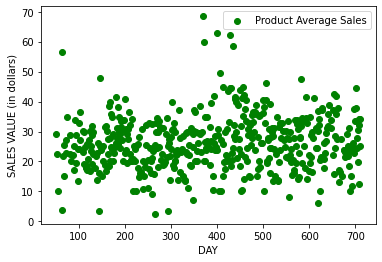

In [57]:
product_average_sales = trans4['SALES_VALUE'].mean()
plt.scatter(product_average_sales.index, product_average_sales, label='Product Average Sales', color='green')
plt.xlabel('DAY')
plt.ylabel('SALES VALUE (in dollars)')
plt.legend()
plt.show()

#### Discounts on transactions & the products that these discounts are applied on

In [21]:
# Calculating Shelf Price
transactions['SHELF_PRICE'] = (transactions['SALES_VALUE']+abs(transactions['COUPON_MATCH_DISC'])+abs(transactions['RETAIL_DISC']))/transactions['QUANTITY']
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,991,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1075,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
3,887,27031467254,5,1004906,1,1.39,298,-0.6,951,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
4,175,27057508267,7,1004906,1,1.99,446,0.0,1383,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580553,1598,42305362535,711,92130,1,0.99,3228,0.0,920,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,0.99
2580554,1598,42305362535,711,114102,1,8.89,3228,0.0,920,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,8.89
2580555,1598,42305362535,711,133449,1,6.99,3228,0.0,920,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,6.99
2580556,1598,42305362535,711,6923644,1,4.5,3228,-0.49,920,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,4.99


In [22]:
transactions[transactions['SHELF_PRICE']<0.00176]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
1000056,2078,27785971087,68,6534178,5423,9.0,343,-0.54,604,10,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.001759
1000058,647,27785975164,68,6534178,9018,15.86,343,-0.01,1013,10,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.00176
1018310,2142,41717535494,668,6534178,4822,8.0,335,-0.48,608,96,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.001759
1018311,1142,41717536008,668,6534178,10942,18.15,335,-1.1,715,96,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.001759


In [23]:
transactions[transactions['SUB_COMMODITY_DESC']=='BANANAS']

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
6204,2375,26984851472,1,1082185,1,1.21,364,0.0,991,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,1.21
6205,98,26984951769,1,1082185,1,0.39,337,0.0,1177,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.39
6206,1060,26985040735,1,1082185,1,0.84,315,0.0,771,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.84
6207,212,26985205886,1,1082185,1,0.65,288,0.0,821,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.65
6208,347,27008813029,3,1082185,1,0.49,367,0.0,1270,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557099,2252,42185357334,703,857571,3,1.39,323,0.0,955,101,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,<NA>,0.463333
2557100,1438,42211972287,705,857571,1,0.86,310,0.0,1053,101,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,<NA>,0.86
2557101,2380,42250740879,708,857571,1,0.57,31401,0.0,993,102,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,<NA>,0.57
2557102,539,42289891395,711,857571,1,0.28,380,0.0,752,102,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,<NA>,0.28


In [24]:
disc = transactions[(transactions.RETAIL_DISC<0.0) | (transactions.COUPON_MATCH_DISC<0.0)]
disc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,991,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1075,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
3,887,27031467254,5,1004906,1,1.39,298,-0.6,951,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
10,1228,27176996928,17,1004906,1,1.79,406,-0.2,927,3,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580546,32,42297590710,711,17258979,1,4.99,1084,-2.0,646,102,0.0,0.0,6210,DRUG GM,National,SHAVING CARE PRODUCTS,RAZORS AND BLADES,3 CT,6.99
2580548,1598,42305362497,711,106589,1,2.0,3228,-1.65,916,102,0.0,0.0,1722,GROCERY,National,FROZEN PIZZA,PIZZA/TRADITIONAL,22.5 OZ,3.65
2580550,1598,42305362497,711,17295222,1,1.0,3228,-0.49,916,102,0.0,0.0,693,DRUG GM,National,CANDY - PACKAGED,SEASONAL CANDY BAGS-CHOCOLATE,4 OZ,1.49
2580551,1598,42305362497,711,17904923,1,1.0,3228,-0.08,916,102,0.0,0.0,1276,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS MULTI-SERVE,32 OZ,1.08


In [25]:
disc = disc.reset_index(drop=True)
disc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,991,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1075,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
3,887,27031467254,5,1004906,1,1.39,298,-0.6,951,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
4,1228,27176996928,17,1004906,1,1.79,406,-0.2,927,3,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309615,32,42297590710,711,17258979,1,4.99,1084,-2.0,646,102,0.0,0.0,6210,DRUG GM,National,SHAVING CARE PRODUCTS,RAZORS AND BLADES,3 CT,6.99
1309616,1598,42305362497,711,106589,1,2.0,3228,-1.65,916,102,0.0,0.0,1722,GROCERY,National,FROZEN PIZZA,PIZZA/TRADITIONAL,22.5 OZ,3.65
1309617,1598,42305362497,711,17295222,1,1.0,3228,-0.49,916,102,0.0,0.0,693,DRUG GM,National,CANDY - PACKAGED,SEASONAL CANDY BAGS-CHOCOLATE,4 OZ,1.49
1309618,1598,42305362497,711,17904923,1,1.0,3228,-0.08,916,102,0.0,0.0,1276,GROCERY,National,ISOTONIC DRINKS,ISOTONIC DRINKS MULTI-SERVE,32 OZ,1.08


In [26]:
disc.STORE_ID.value_counts()

367     33942
406     28148
356     25217
292     23534
381     21994
        ...  
3388        1
1679        1
2698        1
648         1
3073        1
Name: STORE_ID, Length: 550, dtype: Int64

In [27]:
# it will be extremely difficult for us to analyse data for all stores in this project
disc = disc[disc.STORE_ID==367]
disc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
88,2279,28092955094,93,1004906,1,1.0,367,-0.99,1060,14,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
133,1350,28331251951,112,1004906,1,1.79,367,-0.2,1237,17,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
169,1350,30105880505,217,1004906,2,2.69,367,-3.29,1152,32,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,2.99
235,290,30628069901,242,1004906,2,2.99,367,-2.99,925,35,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,2.99
269,883,30673481487,244,1004906,1,2.69,367,-0.3,696,36,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309137,1944,42062918473,694,17903268,1,1.49,367,-0.5,966,100,0.0,0.0,1857,DRUG GM,National,VALENTINE,VALENTINE TRAY PACK CARDS,<NA>,1.99
1309337,1446,42185241317,703,17249639,1,1.88,367,-0.61,1117,101,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,16 OZ,2.49
1309339,1791,42263252555,709,17249639,1,1.88,367,-0.61,803,102,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,16 OZ,2.49
1309415,1446,42185241317,703,17179792,1,3.34,367,-0.65,1117,101,0.0,0.0,764,DRUG GM,National,SOAP - LIQUID & BAR,BAR SOAP,4/4.25 OZ,3.99


In [28]:
disc = disc.reset_index(drop=True)
disc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
0,2279,28092955094,93,1004906,1,1.0,367,-0.99,1060,14,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
1,1350,28331251951,112,1004906,1,1.79,367,-0.2,1237,17,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
2,1350,30105880505,217,1004906,2,2.69,367,-3.29,1152,32,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,2.99
3,290,30628069901,242,1004906,2,2.99,367,-2.99,925,35,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,2.99
4,883,30673481487,244,1004906,1,2.69,367,-0.3,696,36,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33937,1944,42062918473,694,17903268,1,1.49,367,-0.5,966,100,0.0,0.0,1857,DRUG GM,National,VALENTINE,VALENTINE TRAY PACK CARDS,<NA>,1.99
33938,1446,42185241317,703,17249639,1,1.88,367,-0.61,1117,101,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,16 OZ,2.49
33939,1791,42263252555,709,17249639,1,1.88,367,-0.61,803,102,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,16 OZ,2.49
33940,1446,42185241317,703,17179792,1,3.34,367,-0.65,1117,101,0.0,0.0,764,DRUG GM,National,SOAP - LIQUID & BAR,BAR SOAP,4/4.25 OZ,3.99


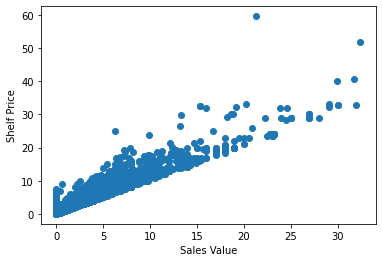

In [29]:
plt.scatter((disc.SALES_VALUE/disc.QUANTITY), disc.SHELF_PRICE)
plt.xlabel("Sales Value")
plt.ylabel("Shelf Price")
plt.show()

In [32]:
disc[disc.SHELF_PRICE>30]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
2261,347,27008813029,3,842614,1,29.03,367,-3.23,1270,1,0.0,0.0,4822,MEAT,National,SMOKED MEATS,HAM - STEAKS/SLICES/CUBES,<NA>,32.26
8151,1490,30054890619,215,857215,1,15.38,367,-17.26,549,31,0.0,0.0,3020,MEAT,National,PORK,LOIN - CHOPS BONELESS,<NA>,32.64
17566,2058,30175735022,223,9677881,1,29.99,367,-3.0,993,33,0.0,0.0,764,DRUG GM,National,ORAL HYGIENE PRODUCTS,WHITENING SYSTEMS,<NA>,32.99
17567,2058,40510140698,585,9677881,1,31.99,367,-1.0,958,84,0.0,0.0,764,DRUG GM,National,ORAL HYGIENE PRODUCTS,WHITENING SYSTEMS,<NA>,32.99
19642,1935,31097328762,276,8203760,1,29.95,367,-10.0,798,40,0.0,0.0,4905,SEAFOOD,National,SEAFOOD - FROZEN,SEAFOOD-FRZ-RW-ALL,<NA>,39.95
22793,205,41351714905,640,828106,1,32.42,367,-19.53,1267,92,0.0,0.0,2945,MEAT,National,BEEF,CHOICE BEEF,<NA>,51.95
28224,1781,31145140303,280,867420,1,15.99,367,-15.99,475,41,0.0,0.0,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,SEAFOOD-FRZ-IQF RAW SHRIMP RW,<NA>,31.98
28766,409,28023942170,88,8203726,1,21.26,367,-38.34,712,13,0.0,0.0,3323,SEAFOOD,National,SEAFOOD-FRESH,SEAFOOD-FRE-SALMON,<NA>,59.6
31472,1229,30032896892,203,12187869,1,29.99,367,-3.0,774,30,0.0,0.0,764,DRUG GM,National,ORAL HYGIENE PRODUCTS,WHITENING SYSTEMS,<NA>,32.99
31696,1829,31046225482,272,12731425,1,23.82,367,-8.01,540,40,0.0,0.0,3671,MEAT,National,SMOKED MEATS,HAMS-WHOLE BONE-IN,<NA>,31.83


In [33]:
diff = disc.SHELF_PRICE - (disc.SALES_VALUE/disc.QUANTITY)
print('Average Discount: $',np.round(diff.mean(),2))
print('Max Discount: $',np.round(max(diff),2))
print('Min Discount: $',np.round(min(diff),9))

Average Discount: $ 0.77
Max Discount: $ 38.34
Min Discount: $ 3.54e-07


In [83]:
t = min(diff)
disc[(disc.SHELF_PRICE - (disc.SALES_VALUE/disc.QUANTITY)) == t]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
11879,1490,30087143147,216,6534178,28279,64.17,367,-0.01,888,32,0.0,0.0,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,<NA>,0.00227


In [98]:
# finding top products/categories where the discount was most applied
g = disc.groupby('COMMODITY_DESC')

In [123]:
x = dict(g.DEPARTMENT.value_counts())
x = dict(Counter(x).most_common(5))
prods = [list(x.keys())[i][0] for i in range(5)]
pct_rep = [np.round((list(x.values())[i]/33942)*100, 2) for i in range(5)]

In [129]:
for i in range(5):
    print(str(pct_rep[i]) + "% of all discounted transactions are on", prods[i])

5.13% of all discounted transactions are on CHEESE
4.52% of all discounted transactions are on SOFT DRINKS
4.06% of all discounted transactions are on BAKED BREAD/BUNS/ROLLS
3.73% of all discounted transactions are on FRZN MEAT/MEAT DINNERS
3.38% of all discounted transactions are on YOGURT


All top products on which discounts are applied belong to the 'Grocery' department of the supermarket.

In [147]:
# top products on discounted vs non-discounted products
ndisc = transactions[(transactions.RETAIL_DISC==0.0) | (transactions.COUPON_MATCH_DISC==0.0)]
ndisc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,991,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1075,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
3,887,27031467254,5,1004906,1,1.39,298,-0.6,951,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
4,175,27057508267,7,1004906,1,1.99,446,0.0,1383,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580553,1598,42305362535,711,92130,1,0.99,3228,0.0,920,102,0.0,0.0,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ,0.99
2580554,1598,42305362535,711,114102,1,8.89,3228,0.0,920,102,0.0,0.0,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,8.89
2580555,1598,42305362535,711,133449,1,6.99,3228,0.0,920,102,0.0,0.0,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ,6.99
2580556,1598,42305362535,711,6923644,1,4.5,3228,-0.49,920,102,0.0,0.0,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ,4.99


In [148]:
ndisc.STORE_ID.value_counts()

367     74822
406     58675
356     48927
381     44964
292     44825
        ...  
659         1
3134        1
3141        1
3009        1
195         1
Name: STORE_ID, Length: 581, dtype: Int64

In [149]:
# it will be extremely difficult for us to analyse data from all stores in this project
ndisc = ndisc[ndisc.STORE_ID==367]
ndisc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
24,1852,27384139385,34,1004906,1,1.99,367,0.0,1035,6,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
33,364,27442787412,40,1004906,1,1.99,367,0.0,1180,6,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
144,266,27924767646,79,1004906,1,1.99,367,0.0,1436,12,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
158,2266,27950453510,82,1004906,1,1.99,367,0.0,871,12,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
208,2279,28092955094,93,1004906,1,1.0,367,-0.99,1060,14,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580078,308,42229344002,706,12810850,1,2.99,367,0.0,967,102,0.0,0.0,5648,DRUG GM,National,GREETING CARDS/WRAP/PARTY SPLY,PARTY SEASONAL,<NA>,2.99
2580079,489,42229346245,706,1120075,1,5.99,367,0.0,1151,102,0.0,0.0,2404,GROCERY,National,IMPORTED WINE,SOUTH AMERICAN WINES,750 ML,5.99
2580303,2055,42263254485,709,17974534,1,5.99,367,0.0,992,102,0.0,0.0,2627,GROCERY,National,DOMESTIC WINE,POPULAR 750ML WINES,750 ML,5.99
2580439,282,42289330262,711,15800498,1,3.82,367,0.0,945,102,0.0,0.0,2991,MEAT,National,VEAL,GRINDS,<NA>,3.82


In [150]:
ndisc = ndisc.reset_index(drop=True)
ndisc

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,SHELF_PRICE
0,1852,27384139385,34,1004906,1,1.99,367,0.0,1035,6,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
1,364,27442787412,40,1004906,1,1.99,367,0.0,1180,6,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
2,266,27924767646,79,1004906,1,1.99,367,0.0,1436,12,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
3,2266,27950453510,82,1004906,1,1.99,367,0.0,871,12,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
4,2279,28092955094,93,1004906,1,1.0,367,-0.99,1060,14,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74817,308,42229344002,706,12810850,1,2.99,367,0.0,967,102,0.0,0.0,5648,DRUG GM,National,GREETING CARDS/WRAP/PARTY SPLY,PARTY SEASONAL,<NA>,2.99
74818,489,42229346245,706,1120075,1,5.99,367,0.0,1151,102,0.0,0.0,2404,GROCERY,National,IMPORTED WINE,SOUTH AMERICAN WINES,750 ML,5.99
74819,2055,42263254485,709,17974534,1,5.99,367,0.0,992,102,0.0,0.0,2627,GROCERY,National,DOMESTIC WINE,POPULAR 750ML WINES,750 ML,5.99
74820,282,42289330262,711,15800498,1,3.82,367,0.0,945,102,0.0,0.0,2991,MEAT,National,VEAL,GRINDS,<NA>,3.82


In [151]:
# finding products that were most sold in non-discounted transactions
g = ndisc.groupby('COMMODITY_DESC')

In [152]:
x = dict(g.DEPARTMENT.value_counts())
x = dict(Counter(x).most_common(5))
prods = [list(x.keys())[i][0] for i in range(5)]
pct_rep = [np.round((list(x.values())[i]/74822)*100, 2) for i in range(5)]

In [153]:
for i in range(5):
    print(str(pct_rep[i]) + "% of all non-discounted transactions are on", prods[i])

3.41% of all non-discounted transactions are on SOFT DRINKS
2.83% of all non-discounted transactions are on CHEESE
2.67% of all non-discounted transactions are on BAKED BREAD/BUNS/ROLLS
2.6% of all non-discounted transactions are on YOGURT
2.5% of all non-discounted transactions are on FLUID MILK PRODUCTS


All the above mentioned products belong to the 'Grocery' department of the supermarket.

In [159]:
""" Assuming store load to be high when discounts are on, we want to see at 
    what time brackets do these transactions happen """
disc.TRANS_TIME = disc.TRANS_TIME.apply(lambda x: x//60)
disc.TRANS_TIME

0        17
1        20
2        19
3        15
4        11
         ..
33937    16
33938    18
33939    13
33940    18
33941    11
Name: TRANS_TIME, Length: 33942, dtype: int64

In [175]:
# Find number of transactions in a given time frame
num_time = dict(disc.groupby('TRANS_TIME').size())
(Counter(num_time)).most_common()

[(18, 3746),
 (17, 3708),
 (19, 3426),
 (16, 2873),
 (14, 2715),
 (20, 2620),
 (15, 2437),
 (21, 2025),
 (13, 1996),
 (12, 1931),
 (11, 1868),
 (10, 1256),
 (22, 1167),
 (9, 593),
 (23, 541),
 (8, 283),
 (0, 244),
 (6, 151),
 (7, 144),
 (1, 124),
 (5, 34),
 (2, 28),
 (3, 25),
 (4, 7)]

As can be seen from the results above, the number or transactions are extremely high between 4 - 7 pm which may be normal because this is also the time when most transactions happen. What is interesting is that a not far behind are the number of discounted transactions happening at 2 pm which is worth investigating in person. 

#### Studying transactions and products on which coupons have been applied, campaigns under which these coupons were released and households that are using these coupons

In [4]:
## Most bought products
products_occuring = pd.DataFrame(coupons_transactions.groupby('PRODUCT_ID').size(), columns = ['Count'])
products_occuring = products_occuring.sort_values('Count', ascending = False)
products_occuring = products_occuring.head(20)

In [5]:
products_occuring = products_occuring.reset_index()
products_occuring

,PRODUCT_ID,Count
0,995876,954
1,919534,666
2,951197,432
3,914190,390
4,957736,336
5,1113141,297
6,990762,297
7,925364,270
8,845265,252
9,5569230,241


In [6]:
products_occuring['Product_Desc'] = np.nan
for i in range(len(products_occuring['PRODUCT_ID'])):
    for j in range(len(coupons['PRODUCT_ID'])):
        if products_occuring['PRODUCT_ID'][i] == coupons['PRODUCT_ID'][j]:
            products_occuring['Product_Desc'][i] = coupons['SUB_COMMODITY_DESC'][j]

C:\Users\khand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
products_occuring

,PRODUCT_ID,Count,Product_Desc
0,995876,954,FRZN GARLIC BREAD/TOAST/STICKS
1,919534,666,REFRIGERATED SPECILATY ROLLS
2,951197,432,REFRIGERATED SPECILATY ROLLS
3,914190,390,CREAM CHEESE
4,957736,336,SPRING WATER
5,1113141,297,MARGARINE: TUBS AND BOWLS
6,990762,297,FRZN GARLIC BREAD/TOAST/STICKS
7,925364,270,FRZN GARLIC BREAD/TOAST/STICKS
8,845265,252,FRZN GARLIC BREAD/TOAST/STICKS
9,5569230,241,SOFT DRINKS 12/18&15PK CAN CAR


<AxesSubplot:xlabel='Product_Desc', ylabel='Count'>

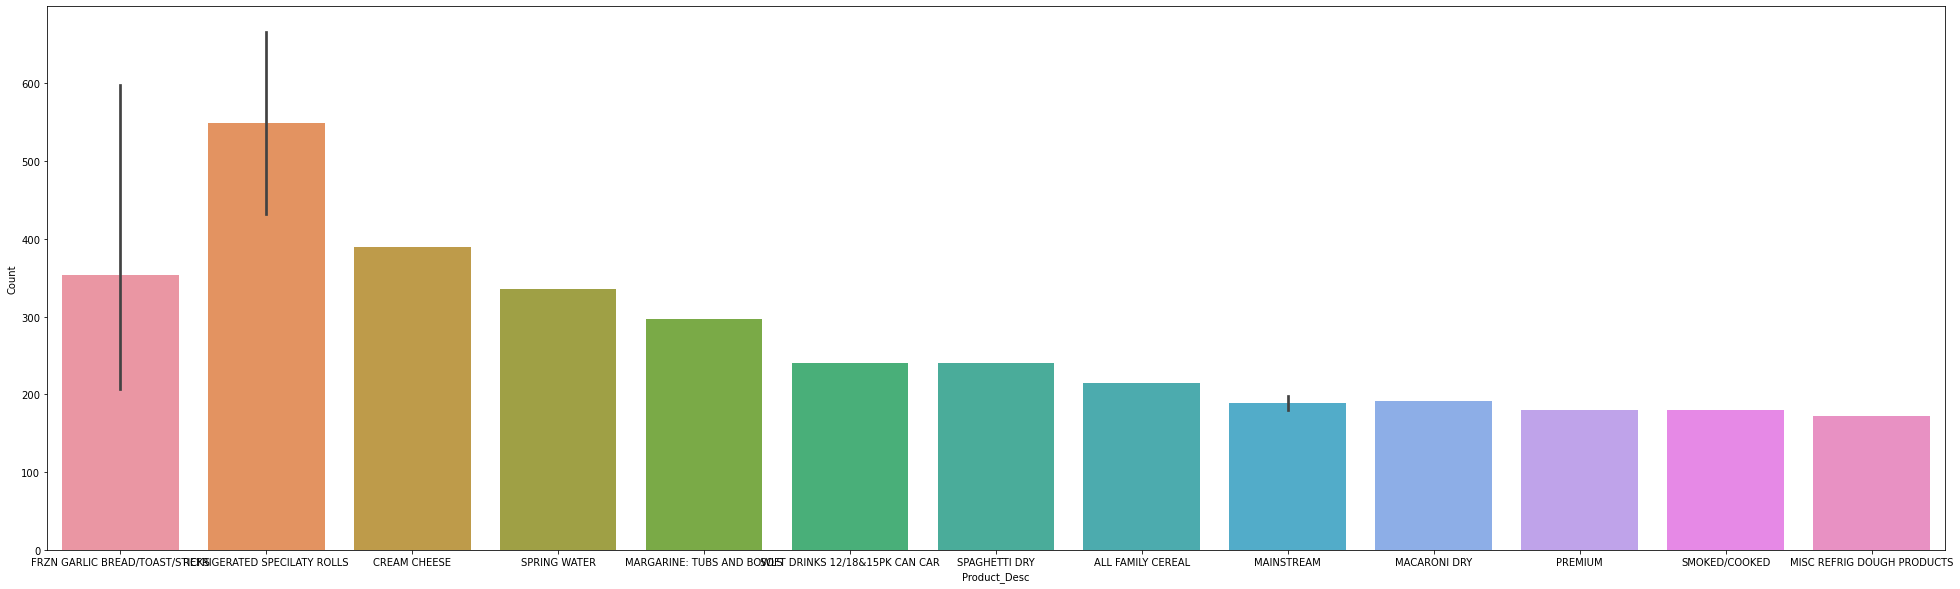

In [8]:
plt.figure(figsize=(34, 10))
sns.barplot(x = products_occuring['Product_Desc'], y = products_occuring['Count'])

In [9]:
# Which household bought the most
household_groups = pd.DataFrame(coupons_transactions.groupby('household_key').size(), columns = ['Count'])
household_groups = household_groups.reset_index()
household_groups = household_groups.sort_values('household_key')
household_groups

,household_key,Count
0,1,183
1,2,7
2,3,97
3,4,1
4,6,5
...,...,...
1604,2494,22
1605,2496,132
1606,2497,16
1607,2499,6


In [10]:
# Merging it with out original household demographic
household_groups1 = pd.merge(hh_demographic, household_groups, on = 'household_key', how = 'inner')

In [11]:
household_groups1 =household_groups1.sort_values('Count', ascending = False)
household_groups1 = household_groups1.set_index(np.arange(len(household_groups1)))
household_groups1

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Count
0,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1,1166,1028
1,35-44,A,75-99K,Homeowner,2 Adults Kids,3,1,574,1005
2,35-44,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2489,899
3,25-34,A,50-74K,Homeowner,2 Adults Kids,4,2,889,789
4,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2448,729
...,...,...,...,...,...,...,...,...,...
677,55-64,A,35-49K,Homeowner,2 Adults Kids,5+,3+,410,1
678,65+,A,15-24K,Homeowner,2 Adults No Kids,2,None/Unknown,1492,1
679,35-44,A,100-124K,Homeowner,2 Adults Kids,4,2,601,1
680,45-54,U,50-74K,Unknown,Unknown,1,None/Unknown,1689,1


In [12]:
# Which campaign had the most number of transactions
campaign_success = pd.DataFrame(coupons_transactions.groupby('CAMPAIGN').size(), columns = ['Count'])
campaign_success = campaign_success.sort_values('Count')
campaign_success = campaign_success.tail(10)
campaign_success = campaign_success.reset_index()
campaign_success

,CAMPAIGN,Count
0,12,1231
1,25,1236
2,22,1258
3,24,1932
4,27,3590
5,30,4361
6,26,4683
7,8,11381
8,18,18147
9,13,18300


<AxesSubplot:xlabel='CAMPAIGN', ylabel='Count'>

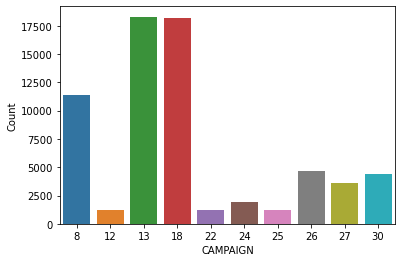

In [13]:
sns.barplot(x = campaign_success['CAMPAIGN'], y = campaign_success['Count'])

In [14]:
# Which coupons had the same product being purchased

coupon_product_department = pd.DataFrame(coupons_transactions.groupby(['COUPON_UPC', 'PRODUCT_ID']).size(), columns = ['Count'])
coupon_product_department = coupon_product_department.sort_values('Count')
coupon_product_department_max = coupon_product_department.tail(10)
coupon_product_department_min = coupon_product_department.head(10)
coupon_product_department_min = coupon_product_department_min.reset_index()
coupon_product_department_max = coupon_product_department_max.reset_index()
#coupon_product_department_min

In [15]:
# Adding description, department and campaign

coupon_product_department_min['Department'] = np.nan
coupon_product_department_min['Commodity_Desc'] = np.nan
coupon_product_department_min['Campaign'] = np.nan
coupon_product_department_max['Department'] = np.nan
coupon_product_department_max['Commodity_Desc'] = np.nan
coupon_product_department_max['Campaign'] = np.nan

for i in range(len(coupon_product_department_min['PRODUCT_ID'])):
    for j in range(len(coupons['PRODUCT_ID'])):
        if coupon_product_department_min['PRODUCT_ID'][i] == coupons['PRODUCT_ID'][j]:
            coupon_product_department_min['Department'][i] = coupons['DEPARTMENT'][j]
            coupon_product_department_min['Commodity_Desc'][i] = coupons['COMMODITY_DESC'][j]
            coupon_product_department_min['Campaign'][i] = coupons['CAMPAIGN'][j]

for i in range(len(coupon_product_department_max['PRODUCT_ID'])):
    for j in range(len(coupons['PRODUCT_ID'])):
        if coupon_product_department_max['PRODUCT_ID'][i] == coupons['PRODUCT_ID'][j]:
            coupon_product_department_max['Department'][i] = coupons['DEPARTMENT'][j]
            coupon_product_department_max['Commodity_Desc'][i] = coupons['COMMODITY_DESC'][j]
            coupon_product_department_max['Campaign'][i] = coupons['CAMPAIGN'][j]

C:\Users\khand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\khand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [16]:
coupon_product_department_min

,COUPON_UPC,PRODUCT_ID,Count,Department,Commodity_Desc,Campaign
0,10000085478,1068982,1,DRUG GM,SHAVING CARE PRODUCTS,18.0
1,10000085496,1064542,1,GROCERY,DOG FOODS,24.0
2,10000085428,13072785,1,DRUG GM,HAND/BODY/FACIAL PRODUCTS,18.0
3,10000085428,13040316,1,COSMETICS,MAKEUP AND TREATMENT,18.0
4,10000085428,13040309,1,DRUG GM,DEODORANTS,18.0
5,10000085496,1068291,1,GROCERY,CAT FOOD,24.0
6,10000085496,1068391,1,GROCERY,CAT FOOD,30.0
7,10000085496,1077274,1,GROCERY,CAT FOOD,24.0
8,10000085428,13039703,1,DRUG GM,HAND/BODY/FACIAL PRODUCTS,18.0
9,10000085496,1078314,1,GROCERY,DOG FOODS,24.0


In [17]:
coupon_product_department_max = coupon_product_department_max.sort_values('Count', ascending = False)

In [18]:
coupon_product_department_max

,COUPON_UPC,PRODUCT_ID,Count,Department,Commodity_Desc,Campaign
9,57045970076,995876,636,GROCERY,FROZEN BREAD/DOUGH,18.0
8,54900050076,5569230,241,GROCERY,SOFT DRINKS,18.0
7,51800000050,919534,222,GROCERY,REFRGRATD DOUGH PRODUCTS,18.0
6,51600070033,1071342,215,GROCERY,COLD CEREAL,18.0
5,57045970076,990762,198,GROCERY,FROZEN BREAD/DOUGH,18.0
4,52732670076,925364,180,GROCERY,FROZEN BREAD/DOUGH,18.0
3,57045970076,845265,168,GROCERY,FROZEN BREAD/DOUGH,18.0
2,53620010028,819063,154,GROCERY,PASTA SAUCE,13.0
1,51800000050,951197,144,GROCERY,REFRGRATD DOUGH PRODUCTS,18.0
0,53620010028,869577,140,GROCERY,PASTA SAUCE,13.0


Campaign 18 is a type A campaign. Type A campaigns are curated for each individual customer based on their purchasing history. This type of campaigning has been a huge success for retailers and should be implemented more often.

In [19]:
coupons_transactions['Total_Price'] = coupons_transactions['SALES_VALUE']*coupons_transactions['QUANTITY']

In [20]:
# Which campaign generated the maximum revenue
money_campaign = coupons_transactions.groupby('CAMPAIGN')['Total_Price'].sum()
money_campaign_index = money_campaign.index
money_campaign_values = money_campaign.values
money_campaign = pd.DataFrame(list(zip(money_campaign_index, money_campaign_values)),
               columns =['Campaign', 'Sum'])

In [21]:
money_campaign = money_campaign.sort_values('Sum', ascending = False)
money_campaign = money_campaign.reset_index()
money_campaign = money_campaign.drop('index', axis = 1)
money_campaign = money_campaign.head(10)
money_campaign

,Campaign,Sum
0,18,141781.77
1,13,102006.27
2,8,58045.12
3,30,25748.41
4,26,25365.69
5,25,18216.19
6,24,14264.14
7,27,11521.80
8,23,8055.76
9,29,7635.75


C:\Users\khand\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Campaign', ylabel='Sum'>

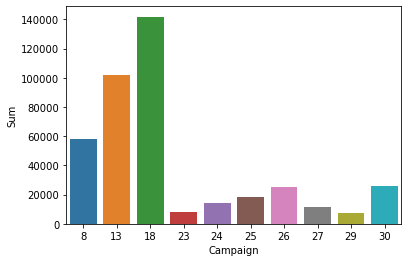

In [22]:
sns.barplot(money_campaign['Campaign'], money_campaign['Sum'])

In [23]:
# Which store generated the maximum revenue
money_store = coupons_transactions.groupby('STORE_ID')['Total_Price'].sum()
money_store_index = money_store.index
money_store_values = money_store.values
money_store = pd.DataFrame(list(zip(money_store_index, money_store_values)),
               columns =['Store_ID', 'Sum'])

In [24]:
money_store = money_store.sort_values('Sum', ascending = False)
money_store = money_store.set_index(np.arange(len(money_store)))
money_store = money_store.head(10)
money_store

,Store_ID,Sum
0,327,18359.03
1,427,14903.53
2,406,13772.68
3,321,12026.34
4,367,11486.51
5,362,10231.61
6,323,9380.39
7,356,8830.29
8,408,8800.14
9,432,8674.81


C:\Users\khand\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Store_ID', ylabel='Sum'>

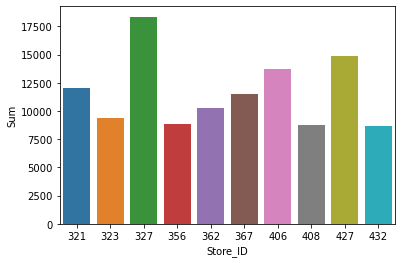

In [25]:
sns.barplot(money_store['Store_ID'], money_store['Sum'])

In [26]:
# Which campaign brought in the most price for each store
money_store_campaign = coupons_transactions.groupby(['STORE_ID', 'CAMPAIGN'])['Total_Price'].sum()
money_store_campaign_index = money_store_campaign.index
money_store_campaign_values = money_store_campaign.values
money_store_campaign = pd.DataFrame(money_store_campaign)

In [27]:
money_store_campaign = money_store_campaign.reset_index()
money_store_campaign = money_store_campaign.sort_values('Total_Price', ascending = False)
money_store_campaign = money_store_campaign.set_index(np.arange(len(money_store_campaign)))
money_store_campaign = money_store_campaign.head(10)
money_store_campaign

,STORE_ID,CAMPAIGN,Total_Price
0,327,18,9798.33
1,406,18,4508.24
2,427,18,3979.90
3,441,18,3834.52
4,427,13,3731.29
5,321,18,3002.17
6,367,13,2960.16
7,367,18,2948.88
8,406,13,2928.70
9,323,18,2817.54


Gautam pointed out that the Store 367 had the most Transactions, but here, we can see that, according to Total sales made with coupons, store 327 had the money in sales.

In [28]:
campaign['Duration'] = campaign['END_DAY']-campaign['START_DAY']
campaign

,household_key,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY,Duration
0,17,26,TypeA,224,264,40
1,27,26,TypeA,224,264,40
2,212,26,TypeA,224,264,40
3,208,26,TypeA,224,264,40
4,192,26,TypeA,224,264,40
...,...,...,...,...,...,...
7203,1803,15,TypeC,547,708,161
7204,1082,15,TypeC,547,708,161
7205,942,15,TypeC,547,708,161
7206,855,15,TypeC,547,708,161


In [29]:
# campaign with most housholds
campaign_household = pd.DataFrame(campaign.groupby('CAMPAIGN').size(), columns = ['Count'])
campaign_household = campaign_household.sort_values('Count', ascending = False)
campaign_household = campaign_household.reset_index()
campaign_household = campaign_household.set_index(np.arange(len(campaign_household)))
campaign_household = campaign_household.head(10)
campaign_household

,CAMPAIGN,Count
0,18,1133
1,13,1077
2,8,1076
3,30,361
4,26,332
5,22,276
6,20,244
7,14,224
8,11,214
9,17,202


In [30]:
campaign

,household_key,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY,Duration
0,17,26,TypeA,224,264,40
1,27,26,TypeA,224,264,40
2,212,26,TypeA,224,264,40
3,208,26,TypeA,224,264,40
4,192,26,TypeA,224,264,40
...,...,...,...,...,...,...
7203,1803,15,TypeC,547,708,161
7204,1082,15,TypeC,547,708,161
7205,942,15,TypeC,547,708,161
7206,855,15,TypeC,547,708,161


In [31]:
df1 = campaign.copy()
df1 = df1.drop(['household_key'], axis = 1)
df1

,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY,Duration
0,26,TypeA,224,264,40
1,26,TypeA,224,264,40
2,26,TypeA,224,264,40
3,26,TypeA,224,264,40
4,26,TypeA,224,264,40
...,...,...,...,...,...
7203,15,TypeC,547,708,161
7204,15,TypeC,547,708,161
7205,15,TypeC,547,708,161
7206,15,TypeC,547,708,161


In [32]:
# Dropping duplicate columns
df1.drop_duplicates(inplace=True)

In [33]:
df1 = df1.sort_values('Duration', ascending = False)
df1 = df1.set_index(np.arange(len(df1)))
df1 = df1.drop(['START_DAY', 'END_DAY'], axis = 1)
df1

,CAMPAIGN,DESCRIPTION,Duration
0,15,TypeC,161
1,20,TypeC,70
2,14,TypeC,65
3,27,TypeC,63
4,28,TypeB,61
5,24,TypeB,60
6,3,TypeC,56
7,18,TypeA,55
8,29,TypeB,53
9,8,TypeA,48


In [34]:
df1.groupby('DESCRIPTION').size()

DESCRIPTION
TypeA     5
TypeB    19
TypeC     6
dtype: int64

<AxesSubplot:xlabel='CAMPAIGN', ylabel='Duration'>

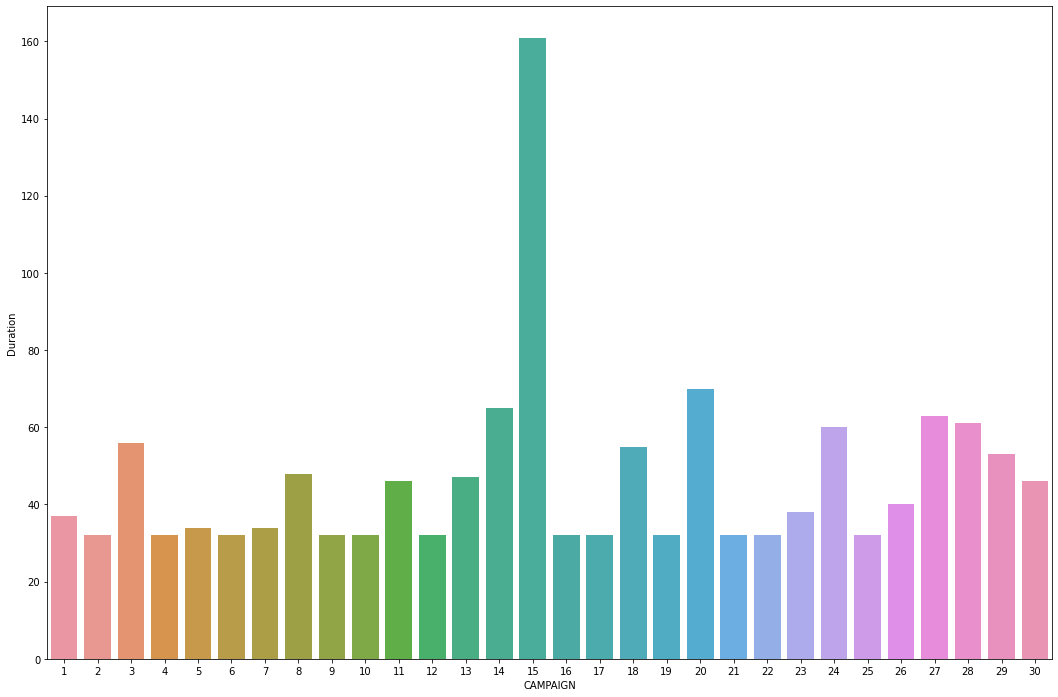

In [35]:
plt.figure(figsize=(18, 12))
sns.barplot(x = df1['CAMPAIGN'], y = df1['Duration'])

Campaign 18 had the most sales, but campaign 15 was on for a longer time.

#### Transaction wise households clustering and analysis of demographics

In [1]:
# importing libraries
import pandas as pd
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

In [2]:
# importing datasets
campaigns = pd.read_csv("campaigns.csv")
coupon_transactions = pd.read_csv("coupon_transactions.csv")
coupons = pd.read_csv("coupons.csv")
hh_demographic = pd.read_csv("hh_demographic.csv")
transactions = pd.read_csv("transactions.csv")
transactions_cleaned = pd.read_csv("transactions_cleaned.csv")

In [3]:
# making an iteratable list of dfs
dfs = [campaigns,coupon_transactions,coupons,hh_demographic,transactions_cleaned]

In [4]:
# dropping the unwanted columns
for i in dfs:
    i.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
# combining cleaned transctions with hh_demographic
new_df = pd.merge(transactions_cleaned,hh_demographic,on="household_key")

In [8]:
hh_demographic['AGE_DESC'].value_counts()
# 45 - 54 is the age group with maximum customers

45-54    288
35-44    194
25-34    142
65+       72
55-64     59
19-24     46
Name: AGE_DESC, dtype: int64

In [9]:
hh_demographic['HOMEOWNER_DESC'].value_counts()

Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: HOMEOWNER_DESC, dtype: int64

In [10]:
# instead of 5+ we are using 5 to make calculations simpler
for i in range(len(hh_demographic["HOUSEHOLD_SIZE_DESC"])):
    if hh_demographic["HOUSEHOLD_SIZE_DESC"][i] == "5+":
        hh_demographic["HOUSEHOLD_SIZE_DESC"][i] = 5

D:\anaconda3\envs\tryenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
# type conversion for analysis
hh_demographic["HOUSEHOLD_SIZE_DESC"]=hh_demographic["HOUSEHOLD_SIZE_DESC"].astype(int)

In [26]:
something = hh_demographic.groupby("INCOME_DESC")["HOUSEHOLD_SIZE_DESC"].agg(lambda x:x.value_counts().index[0])
something

INCOME_DESC
100-124K     2
125-149K     2
15-24K       1
150-174K     2
175-199K     1
200-249K     2
25-34K       1
250K+        2
35-49K       2
50-74K       1
75-99K       2
Under 15K    2
Name: HOUSEHOLD_SIZE_DESC, dtype: int32

Text(0.5, 1.0, 'Common household size by income brackets')

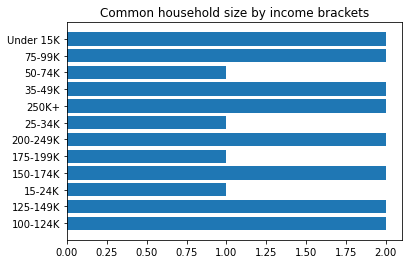

In [28]:
labs = list(something.index)
plt.barh(labs,something.values)
plt.title("Common household size by income brackets")

In [16]:
second_groupby = hh_demographic.groupby(["HOMEOWNER_DESC","MARITAL_STATUS_CODE"])["household_key"].count()
second_groupby
# A - married, B - Single, U - Unknown

HOMEOWNER_DESC   MARITAL_STATUS_CODE
Homeowner        A                      293
                 B                       75
                 U                      136
Probable Owner   A                        5
                 B                        2
                 U                        4
Probable Renter  A                        1
                 B                        2
                 U                        8
Renter           A                       18
                 B                       18
                 U                        6
Unknown          A                       23
                 B                       20
                 U                      190
Name: household_key, dtype: int64

Text(0.5, 1.0, 'Unknown')

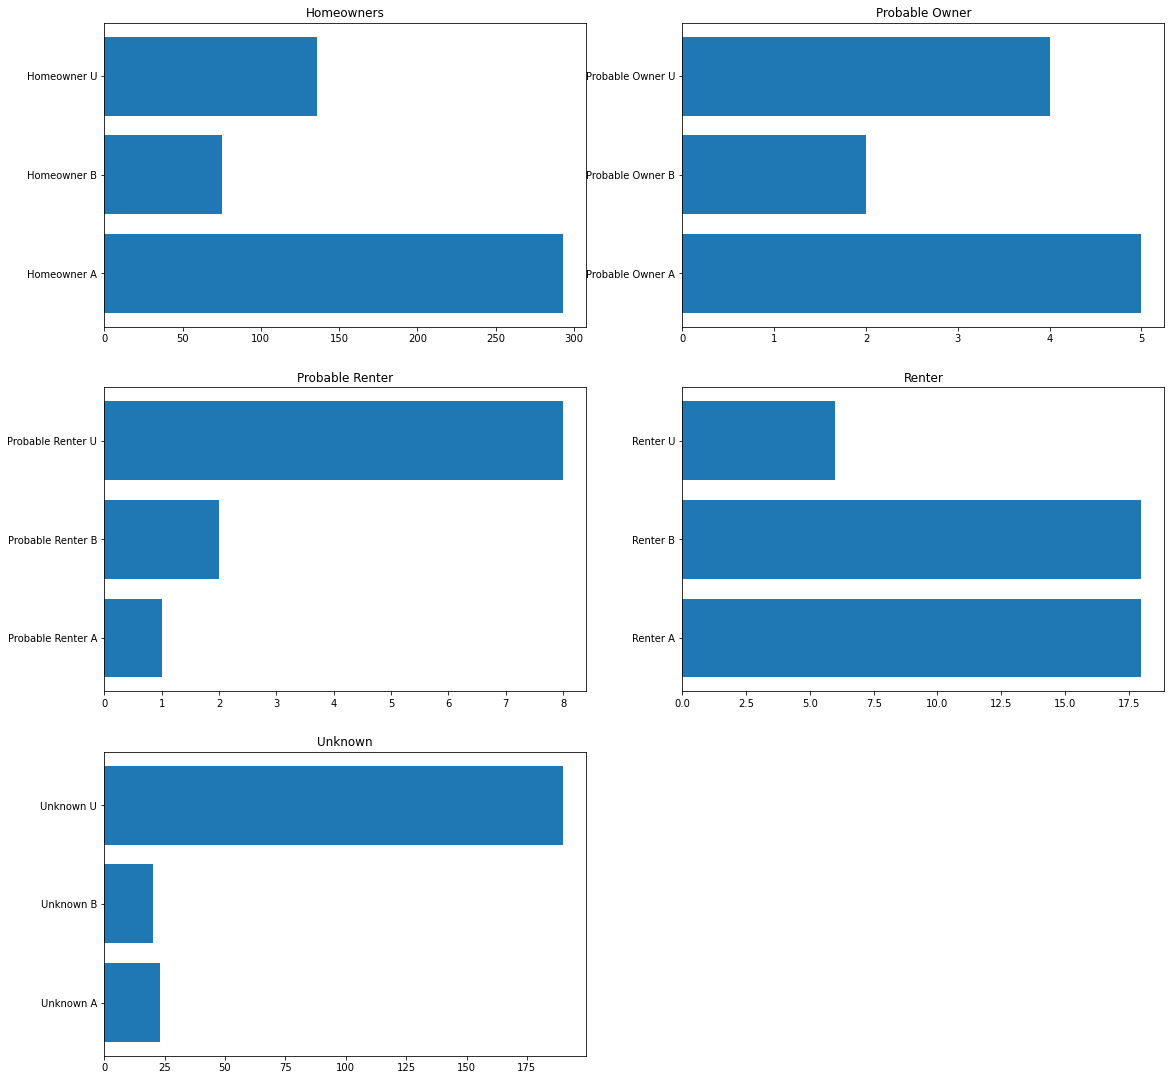

In [23]:
fig = plt.figure(figsize=(19, 19))

plt.subplot(3,2,1)
labs = list(second_groupby[:3].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,second_groupby[:3].values)
plt.title("Homeowners")

plt.subplot(3,2,2)
labs = list(second_groupby[3:6].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,second_groupby[3:6].values)
plt.title("Probable Owner")

plt.subplot(3,2,3)
labs = list(second_groupby[6:9].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,second_groupby[6:9].values)
plt.title("Probable Renter")

plt.subplot(3,2,4)
labs = list(second_groupby[9:12].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,second_groupby[9:12].values)
plt.title("Renter")

plt.subplot(3,2,5)
labs = list(second_groupby[12:].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,second_groupby[12:].values)
plt.title("Unknown")

In [18]:
hh_demographic["INCOME_DESC"].value_counts()

50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
175-199K      11
250K+         11
200-249K       5
Name: INCOME_DESC, dtype: int64

In [19]:
first_groupby = hh_demographic.groupby(["AGE_DESC","INCOME_DESC"])["MARITAL_STATUS_CODE"].count()

Text(0.5, 1.0, 'People in the age bracket of 65+ salary bracket wise')

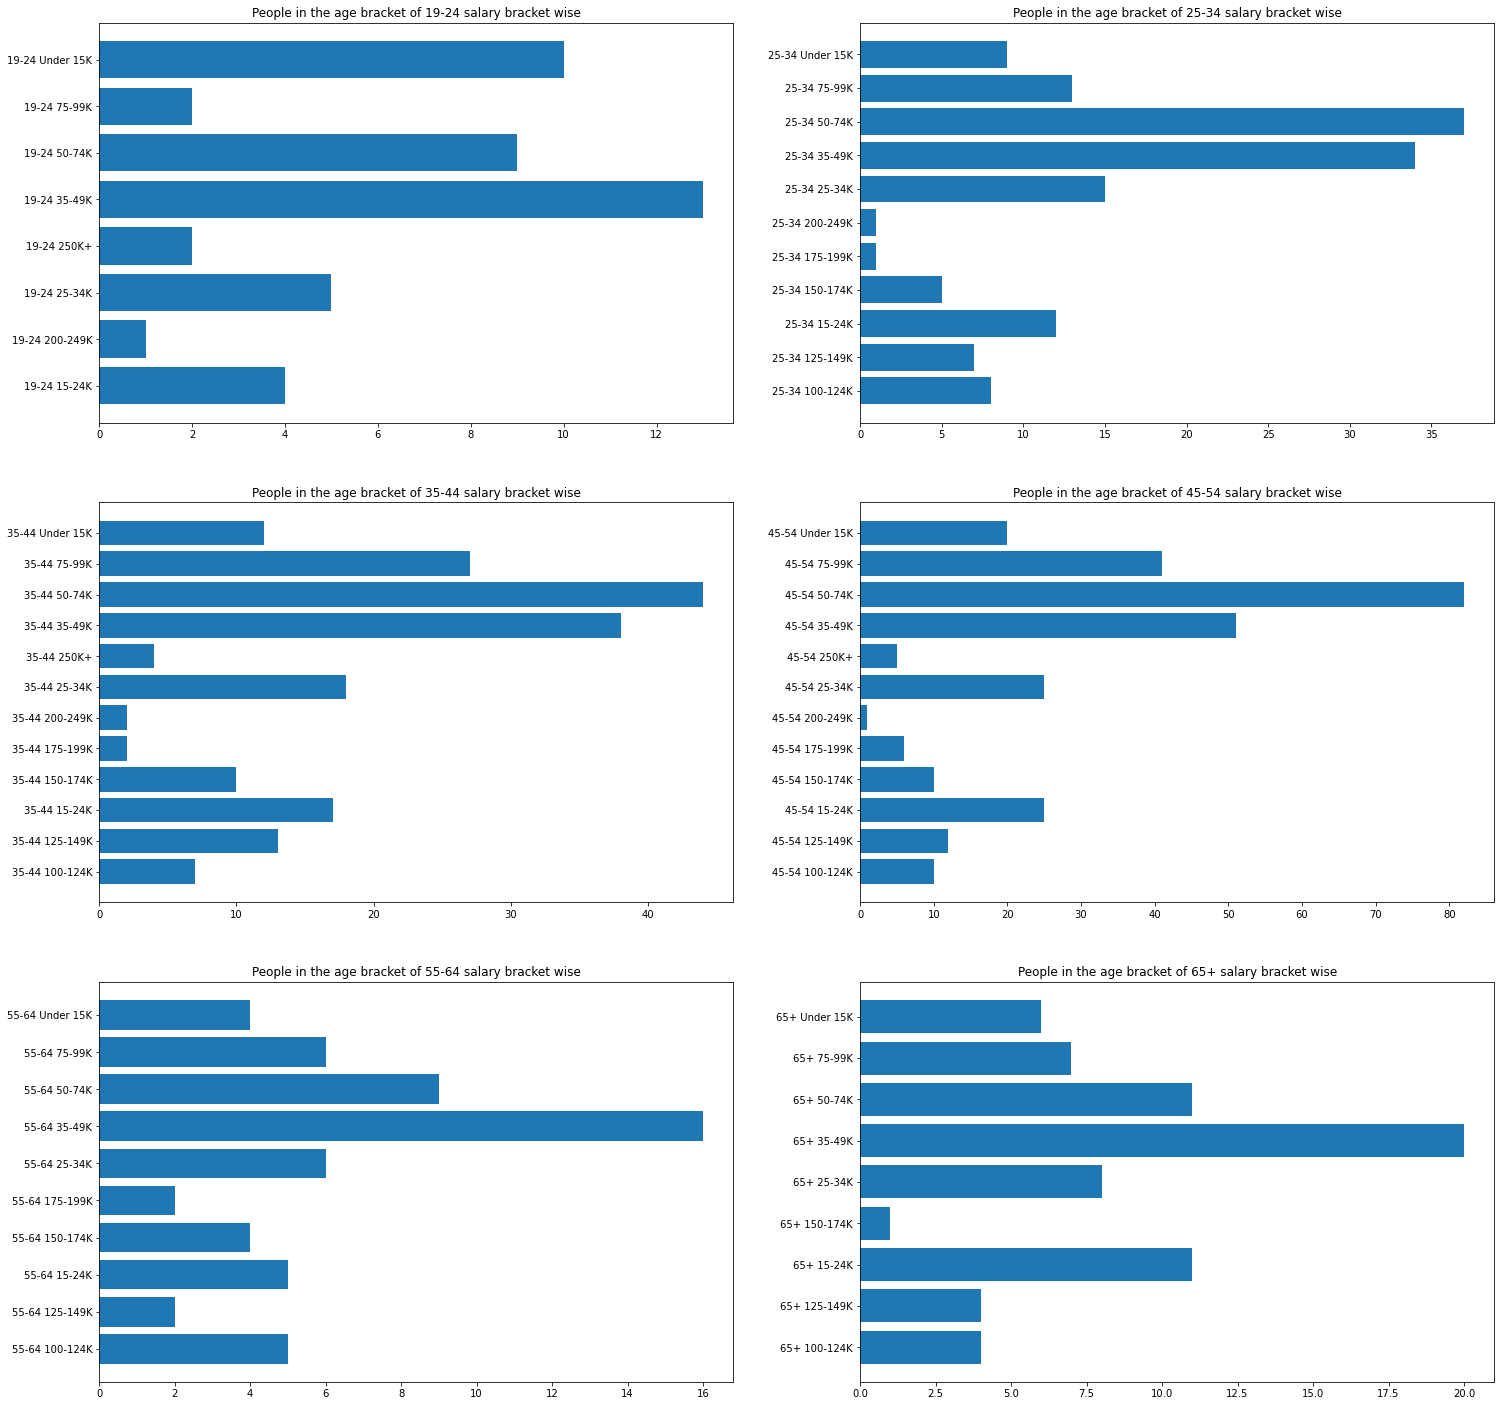

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 25))

plt.subplot(3,2,1)
labs = list(first_groupby[:8].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,first_groupby[:8].values)
plt.title("People in the age bracket of 19-24 salary bracket wise")

plt.subplot(3,2,2)
labs = list(first_groupby[8:19].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,first_groupby[8:19].values)
plt.title("People in the age bracket of 25-34 salary bracket wise")

plt.subplot(3,2,3)
labs = list(first_groupby[19:31].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,first_groupby[19:31].values)
plt.title("People in the age bracket of 35-44 salary bracket wise")

plt.subplot(3,2,4)
labs = list(first_groupby[31:43].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,first_groupby[31:43].values)
plt.title("People in the age bracket of 45-54 salary bracket wise")

plt.subplot(3,2,5)
labs = list(first_groupby[43:53].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,first_groupby[43:53].values)
plt.title("People in the age bracket of 55-64 salary bracket wise")

plt.subplot(3,2,6)
labs = list(first_groupby[53:].index)
labs2 = [" ".join(i) for i in labs]
plt.barh(labs2,first_groupby[53:].values)
plt.title("People in the age bracket of 65+ salary bracket wise")


# last two entries cannot be printed due to restrictions

In [21]:
data_mean, data_std = mean(new_df["RETAIL_DISC"]), std(new_df["RETAIL_DISC"])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in new_df["RETAIL_DISC"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in new_df["RETAIL_DISC"] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 19361
Non-outlier observations: 1399462


In [22]:
np.mean(outliers_removed)

-0.44138779045090204

In [111]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [112]:
# importing datasets
hh_demographic = pd.read_csv("hh_demographic.csv")
transactions_cleaned = pd.read_csv("transactions_cleaned.csv")

In [113]:
# dropping unwanted columns
hh_demographic.drop("Unnamed: 0",axis=1,inplace=True)
transactions_cleaned.drop("Unnamed: 0",axis=1,inplace=True)

In [114]:
# merging datasets
df = pd.merge(transactions_cleaned,hh_demographic,on="household_key")

In [115]:
# making a copy of the df to perform partial analysis
new_df = df.copy()

In [116]:
new_df.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'MANUFACTURER', 'DEPARTMENT',
       'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'],
      dtype='object')

In [117]:
# defining functions for time conversion to minutes
def min_func(x):
    xx=(x-(x%100))/100
    yy=x%100
    return ((xx*60)+yy)

In [118]:
# using lamba to set the column values
new_df["TRANS_TIME_IN_MIN"] = new_df["TRANS_TIME"].apply(lambda x: min_func(x))
df["TRANS_TIME_IN_MIN"] = df["TRANS_TIME"].apply(lambda x: min_func(x))

In [119]:
# dropping less relevant columns for clustering
new_df.drop(["CURR_SIZE_OF_PRODUCT","WEEK_NO"],axis=1,inplace=True)

In [120]:
new_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,...,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,TRANS_TIME_IN_MIN
0,1929,27021022215,4,1004906,1,1.39,441,-0.60,1755,0.0,...,POTATOES,POTATOES RUSSET (BULK&BAG),35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown,1075.0
1,1929,27601005106,52,1004906,1,1.99,441,0.00,1917,0.0,...,POTATOES,POTATOES RUSSET (BULK&BAG),35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown,1157.0
2,1929,28110785584,95,1004906,1,1.00,292,-0.99,1104,0.0,...,POTATOES,POTATOES RUSSET (BULK&BAG),35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown,664.0
3,1929,30032381853,202,1004906,1,2.99,441,0.00,1823,0.0,...,POTATOES,POTATOES RUSSET (BULK&BAG),35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown,1103.0
4,1929,30035429101,207,1004906,1,2.99,292,0.00,2201,0.0,...,POTATOES,POTATOES RUSSET (BULK&BAG),35-44,B,25-34K,Homeowner,Single Male,1,None/Unknown,1321.0


In [121]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418823 entries, 0 to 1418822
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   household_key        1418823 non-null  int64  
 1   BASKET_ID            1418823 non-null  int64  
 2   DAY                  1418823 non-null  int64  
 3   PRODUCT_ID           1418823 non-null  int64  
 4   QUANTITY             1418823 non-null  int64  
 5   SALES_VALUE          1418823 non-null  float64
 6   STORE_ID             1418823 non-null  int64  
 7   RETAIL_DISC          1418823 non-null  float64
 8   TRANS_TIME           1418823 non-null  int64  
 9   COUPON_DISC          1418823 non-null  float64
 10  COUPON_MATCH_DISC    1418823 non-null  float64
 11  MANUFACTURER         1418823 non-null  int64  
 12  DEPARTMENT           1418823 non-null  object 
 13  BRAND                1418823 non-null  object 
 14  COMMODITY_DESC       1418823 non-null  object 
 15

In [122]:
new_df.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,TRANS_TIME_IN_MIN
count,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06,1.418823e+06
mean,1.270801e+03,3.414817e+10,3.948019e+02,2.941179e+06,1.155442e+02,3.170033e+00,3.353248e+03,-5.379818e-01,1.547399e+03,-1.490308e-02,-3.740093e-03,1.008203e+03,9.403076e+02
std,7.413928e+02,4.680233e+09,1.868368e+02,3.888898e+06,1.255842e+03,4.257401e+00,9.244325e+03,1.227962e+00,3.855059e+02,1.793076e-01,4.385813e-02,1.371428e+03,2.313240e+02
min,1.000000e+00,2.698490e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.300200e+02,0.000000e+00,-5.593000e+01,-4.050000e+00,2.000000e+00,0.000000e+00
25%,6.300000e+02,3.058037e+10,2.390000e+02,9.183350e+05,1.000000e+00,1.300000e+00,3.330000e+02,-6.900000e-01,1.258000e+03,0.000000e+00,0.000000e+00,6.900000e+01,7.780000e+02
50%,1.260000e+03,3.289532e+10,3.990000e+02,1.029171e+06,1.000000e+00,2.130000e+00,3.750000e+02,-2.000000e-02,1.559000e+03,0.000000e+00,0.000000e+00,5.440000e+02,9.590000e+02
75%,1.939000e+03,4.012858e+10,5.560000e+02,1.133169e+06,1.000000e+00,3.490000e+00,4.240000e+02,0.000000e+00,1.831000e+03,0.000000e+00,0.000000e+00,1.266000e+03,1.111000e+03
max,2.499000e+03,4.230271e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,7.900000e-01,2.359000e+03,0.000000e+00,0.000000e+00,6.477000e+03,1.439000e+03


In [123]:
# label encoding all the necessary columns for clustering
objList = new_df.select_dtypes(include = "object").columns
print (objList)
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

Index(['DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'],
      dtype='object')


In [124]:
new_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,...,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,TRANS_TIME_IN_MIN
0,1929,27021022215,4,1004906,1,1.39,441,-0.60,1755,0.0,...,230,1614,2,1,6,0,4,0,3,1075.0
1,1929,27601005106,52,1004906,1,1.99,441,0.00,1917,0.0,...,230,1614,2,1,6,0,4,0,3,1157.0
2,1929,28110785584,95,1004906,1,1.00,292,-0.99,1104,0.0,...,230,1614,2,1,6,0,4,0,3,664.0
3,1929,30032381853,202,1004906,1,2.99,441,0.00,1823,0.0,...,230,1614,2,1,6,0,4,0,3,1103.0
4,1929,30035429101,207,1004906,1,2.99,292,0.00,2201,0.0,...,230,1614,2,1,6,0,4,0,3,1321.0


In [125]:
# Experimenting with different number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='random', max_iter=100, n_init=3, verbose=1)
    kmeans.fit(new_df)
    sse.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 3.1083288508430584e+25.
Iteration 1, inertia 3.107872704765365e+25.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4.22341185861101e+25.
Iteration 1, inertia 3.107872704765365e+25.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.2393441714202193e+26.
Iteration 1, inertia 3.107872704765365e+25.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8.927550348702901e+25
Iteration 1, inertia 8.46088370865733e+24
Iteration 2, inertia 5.497062203389703e+24
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2.348960259547473e+25
Iteration 1, inertia 5.497062203389706e+24
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2.961204060089114e+25
Iteration 1, inertia 8.851477702652113e+24
Iteration 2, inertia 6.342394925223171e+24
Iteration 3, inert

Iteration 10, inertia 4.515530008329154e+23
Iteration 11, inertia 4.505284740049672e+23
Iteration 12, inertia 4.497464028119624e+23
Iteration 13, inertia 4.489163730167491e+23
Iteration 14, inertia 4.4842278930426416e+23
Iteration 15, inertia 4.476617871728512e+23
Iteration 16, inertia 4.473874772028123e+23
Iteration 17, inertia 4.4671784877315835e+23
Iteration 18, inertia 4.4615658907888895e+23
Iteration 19, inertia 4.45911831039913e+23
Iteration 20, inertia 4.4552980196369975e+23
Iteration 21, inertia 4.452816059709687e+23
Converged at iteration 21: center shift 13000896541.468754 within tolerance 91269098423019.81.
Initialization complete
Iteration 0, inertia 1.0619944738109982e+24
Iteration 1, inertia 5.9013164168968964e+23
Iteration 2, inertia 5.400305284477893e+23
Iteration 3, inertia 5.067798671623716e+23
Iteration 4, inertia 4.854696626164821e+23
Iteration 5, inertia 4.7158302635776465e+23
Iteration 6, inertia 4.677292165833938e+23
Iteration 7, inertia 4.6147058031499194e+23
It

Iteration 30, inertia 3.419363535513155e+23
Iteration 31, inertia 3.3817068616390824e+23
Iteration 32, inertia 3.3284762020392364e+23
Iteration 33, inertia 3.307408230528028e+23
Iteration 34, inertia 3.2654966352294684e+23
Iteration 35, inertia 3.228141254978485e+23
Iteration 36, inertia 3.1822851482772076e+23
Iteration 37, inertia 3.140417790649157e+23
Iteration 38, inertia 3.119824490650943e+23
Iteration 39, inertia 3.0969706609587465e+23
Iteration 40, inertia 3.091564726978573e+23
Iteration 41, inertia 3.091061794679756e+23
Iteration 42, inertia 3.089904352169061e+23
Iteration 43, inertia 3.0889092728823356e+23
Iteration 44, inertia 3.088742489892343e+23
Converged at iteration 44: center shift 66163792332.47611 within tolerance 91269098423019.81.
Initialization complete
Iteration 0, inertia 9.567394513913904e+23
Iteration 1, inertia 4.844176301345071e+23
Iteration 2, inertia 3.9695018975291604e+23
Iteration 3, inertia 3.531671198242647e+23
Iteration 4, inertia 3.375067868993168e+23


Iteration 0, inertia 2.3733801563237898e+24
Iteration 1, inertia 1.5677605312559183e+24
Iteration 2, inertia 1.240216339172491e+24
Iteration 3, inertia 9.862054284889774e+23
Iteration 4, inertia 8.129001313422038e+23
Iteration 5, inertia 6.823851309781787e+23
Iteration 6, inertia 6.248057347971979e+23
Iteration 7, inertia 5.731555185114983e+23
Iteration 8, inertia 5.476366769005732e+23
Iteration 9, inertia 5.354581428618988e+23
Iteration 10, inertia 5.211111606996942e+23
Iteration 11, inertia 5.095380998922366e+23
Iteration 12, inertia 4.99136118508504e+23
Iteration 13, inertia 4.864487431030162e+23
Iteration 14, inertia 4.7486136006149335e+23
Iteration 15, inertia 4.6074455944417204e+23
Iteration 16, inertia 4.469513171064714e+23
Iteration 17, inertia 4.335894031226697e+23
Iteration 18, inertia 4.221980995830046e+23
Iteration 19, inertia 4.133259070426711e+23
Iteration 20, inertia 4.0839303827066553e+23
Iteration 21, inertia 4.0763512243951165e+23
Iteration 22, inertia 4.0708474844034

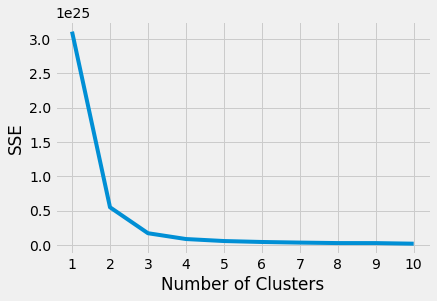

In [126]:
# plotting the elbow graph to decide number of clusters
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [127]:
# clusters = 3 (best model)
kmeans_final = KMeans(n_clusters=3,init='random', max_iter=100, n_init=3, verbose=1)
kmeans_final.fit(new_df)

Initialization complete
Iteration 0, inertia 1.3364216585054108e+25
Iteration 1, inertia 4.8039743205800523e+24
Iteration 2, inertia 3.105523848533667e+24
Iteration 3, inertia 2.2085734680972344e+24
Iteration 4, inertia 1.8749130311648919e+24
Iteration 5, inertia 1.7746670479097974e+24
Iteration 6, inertia 1.733241465955882e+24
Iteration 7, inertia 1.7202424783041176e+24
Iteration 8, inertia 1.7186232271005492e+24
Iteration 9, inertia 1.7174880192404031e+24
Iteration 10, inertia 1.717148225537605e+24
Iteration 11, inertia 1.716998024088384e+24
Converged at iteration 11: center shift 58402401544230.414 within tolerance 91269098423019.81.
Initialization complete
Iteration 0, inertia 8.007067076931792e+24
Iteration 1, inertia 2.119165242063406e+24
Iteration 2, inertia 1.8504809051893327e+24
Iteration 3, inertia 1.763079153491685e+24
Iteration 4, inertia 1.730746872425075e+24
Iteration 5, inertia 1.7202270336222195e+24
Iteration 6, inertia 1.7186232271005492e+24
Iteration 7, inertia 1.7174

KMeans(init='random', max_iter=100, n_clusters=3, n_init=3, verbose=1)

In [128]:
# predicting and appending labels to the dataframe for segregation
labels = kmeans_final.predict(new_df)
new_df['kmeans_labels'] = labels

In [129]:
# displaying density of rows among the clusters
new_df.groupby("kmeans_labels")["MARITAL_STATUS_CODE"].count()

kmeans_labels
0    541753
1    494233
2    382837
Name: MARITAL_STATUS_CODE, dtype: int64

In [130]:
# slicing dataset based on cluster
new_df_cluster0 = new_df[new_df['kmeans_labels']==0]
new_df_cluster1 = new_df[new_df['kmeans_labels']==1]
new_df_cluster2 = new_df[new_df['kmeans_labels']==2]

In [131]:
# doing an inverse transform to retrieve old dataset for futher analysis
new_df_cluster0_inverse = df.loc[new_df_cluster0.index.tolist()]
new_df_cluster1_inverse = df.loc[new_df_cluster1.index.tolist()]
new_df_cluster2_inverse = df.loc[new_df_cluster2.index.tolist()]

In [132]:
# calculating total basket value based on sales_value
x = new_df_cluster0_inverse.groupby("BASKET_ID")["SALES_VALUE"].sum()
sales_list_cluster0 = [x.iloc[i] for i in range(len(x))]

x = new_df_cluster1_inverse.groupby("BASKET_ID")["SALES_VALUE"].sum()
sales_list_cluster1 = [x.iloc[i] for i in range(len(x))]

x = new_df_cluster2_inverse.groupby("BASKET_ID")["SALES_VALUE"].sum()
sales_list_cluster2 = [x.iloc[i] for i in range(len(x))]

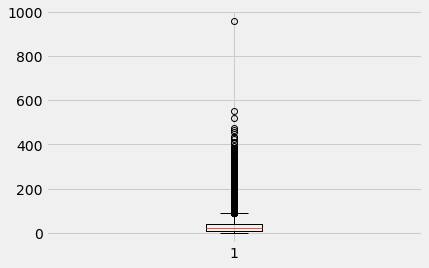

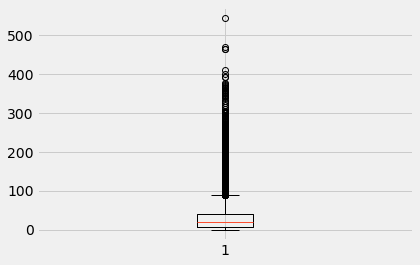

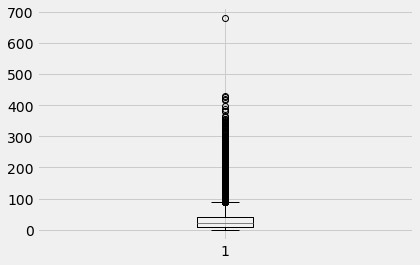

In [133]:
# plotting to display distribution of points
plt.boxplot(sales_list_cluster0)
plt.show()

plt.boxplot(sales_list_cluster1)
plt.show()

plt.boxplot(sales_list_cluster2)
plt.show()

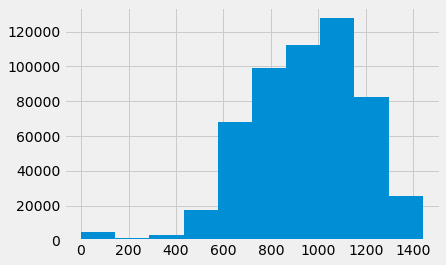

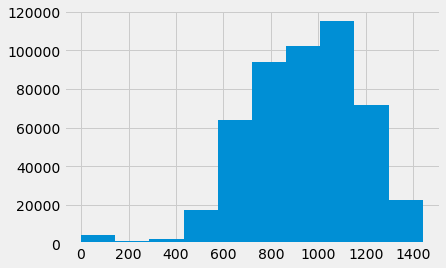

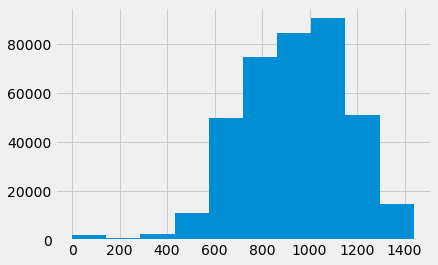

In [134]:
# plotting histograms to sense the distribution
plt.hist(new_df_cluster0_inverse["TRANS_TIME_IN_MIN"])
plt.show()

plt.hist(new_df_cluster1_inverse["TRANS_TIME_IN_MIN"])
plt.show()

plt.hist(new_df_cluster2_inverse["TRANS_TIME_IN_MIN"])
plt.show()
# 5pm to 8pm highest sales

In [135]:
xxx=pd.DataFrame(new_df_cluster0_inverse["STORE_ID"].value_counts())
xxx1=pd.DataFrame(new_df_cluster1_inverse["STORE_ID"].value_counts())
xxx2=pd.DataFrame(new_df_cluster2_inverse["STORE_ID"].value_counts())

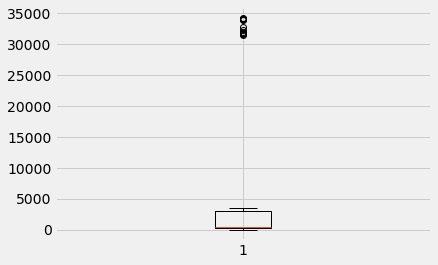

In [136]:

plt.boxplot(xxx2.index)
plt.show()

In [137]:
# stores with big quantity purchases
print(np.unique(xxx[xxx.index>30000]["STORE_ID"]))
print(np.unique(xxx1[xxx1.index>30000]["STORE_ID"]))
print(np.unique(xxx2[xxx2.index>30000]["STORE_ID"]))

[ 383 1573 1694 1751 2032 2444 3548 8139 8283 9056 9931]
[   4    7 1304 1588 1667 2366 6218 7058 8760 9046]
[   3    5    6   14   15  291  428 1343 1579 1865 2128 3483 3586 5396
 5468 5767 6825 7557]


In [138]:
# trying to find intersecting store if any
set((xxx[xxx.index>30000]["STORE_ID"])).intersection(set((xxx1[xxx1.index>30000]["STORE_ID"])),set((xxx2[xxx2.index>30000]["STORE_ID"])))

set()

In [139]:
# plt.boxplot(xxx.index[xxx.index<4000])
# plt.show()
len(xxx.index[xxx.index<4000])/len(xxx.index)

0.9510204081632653

### 8: Conclusion

Businesses that are intricately modelled around their customers have been known to perform and progress better. For example, in our analysis we have seen that personalised campaigns have had the highest record of transactions as compared to any other campaign which might or might not have better coupons. This makes analysis of transactions data extremely valuable to a brand or a retailer. 

On adapting according to the inferences obtained from this data, a retailer can understand what customer segments does xhe want to target and formulate ways to bring an increase in sales and profits.

### 9: References

The Dunnhumby Webiste: https://www.dunnhumby.com/